# INSTALLING THE ULTRALYTICS PACKAGE

**Ultralytics** is a *Python package* developed by Ultralytics, the creators of the popular YOLO (You Only Look Once) object detection models.

Installing this package gives you access to:

The YOLOv8 models (latest as of now).

Tools to perform object detection, image segmentation, pose estimation, classification, and more.

A simple interface to train custom models, run inference, and evaluate results.

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

# IMPORTING ALL THE REQUIRED LIBRARIES
Verifies your Python version.

Checks for required dependencies (like torch, opencv-python, etc.).

Shows versions of important libraries.

Confirms your system supports features like CUDA (GPU acceleration).

Warns if anything is missing or outdated.

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


#Download Dataset from Roboflow

I installed Python on my system to set up the development environment. Then, I installed the roboflow package and used its private API by providing an API key. After that, I accessed a specific workspace and project, selected the desired dataset version, and downloaded the dataset in YOLOv11.
ROBOFLOW API KEY = YvybSTsXPqBHuFgMFOsk

In [2]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="YvybSTsXPqBHuFgMFOsk")
project = rf.workspace("kunal-gaikwad").project("augmented-neu-dataset")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [3]:
dataset.location

'/content/Augmented-Neu-Dataset--3'

# Train YOLO11 Model on a Custom Dataset
Training the model on the dataset and going through all the images once, while rezising it to 200x200 so that the training is consistent because training smaller pixels is much faster.

In [20]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="/content/yolo11m.pt" epochs=50 imgsz=200

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Augmented-Neu-Dataset--3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=200, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

# Examine Training Results

In [21]:
!find /content -name "confusion_matrix.png"

/content/runs/detect/train4/confusion_matrix.png
/content/runs/detect/val/confusion_matrix.png
/content/runs/detect/train3/confusion_matrix.png
/content/runs/detect/train/confusion_matrix.png


Confusion matrix (the accuracy)

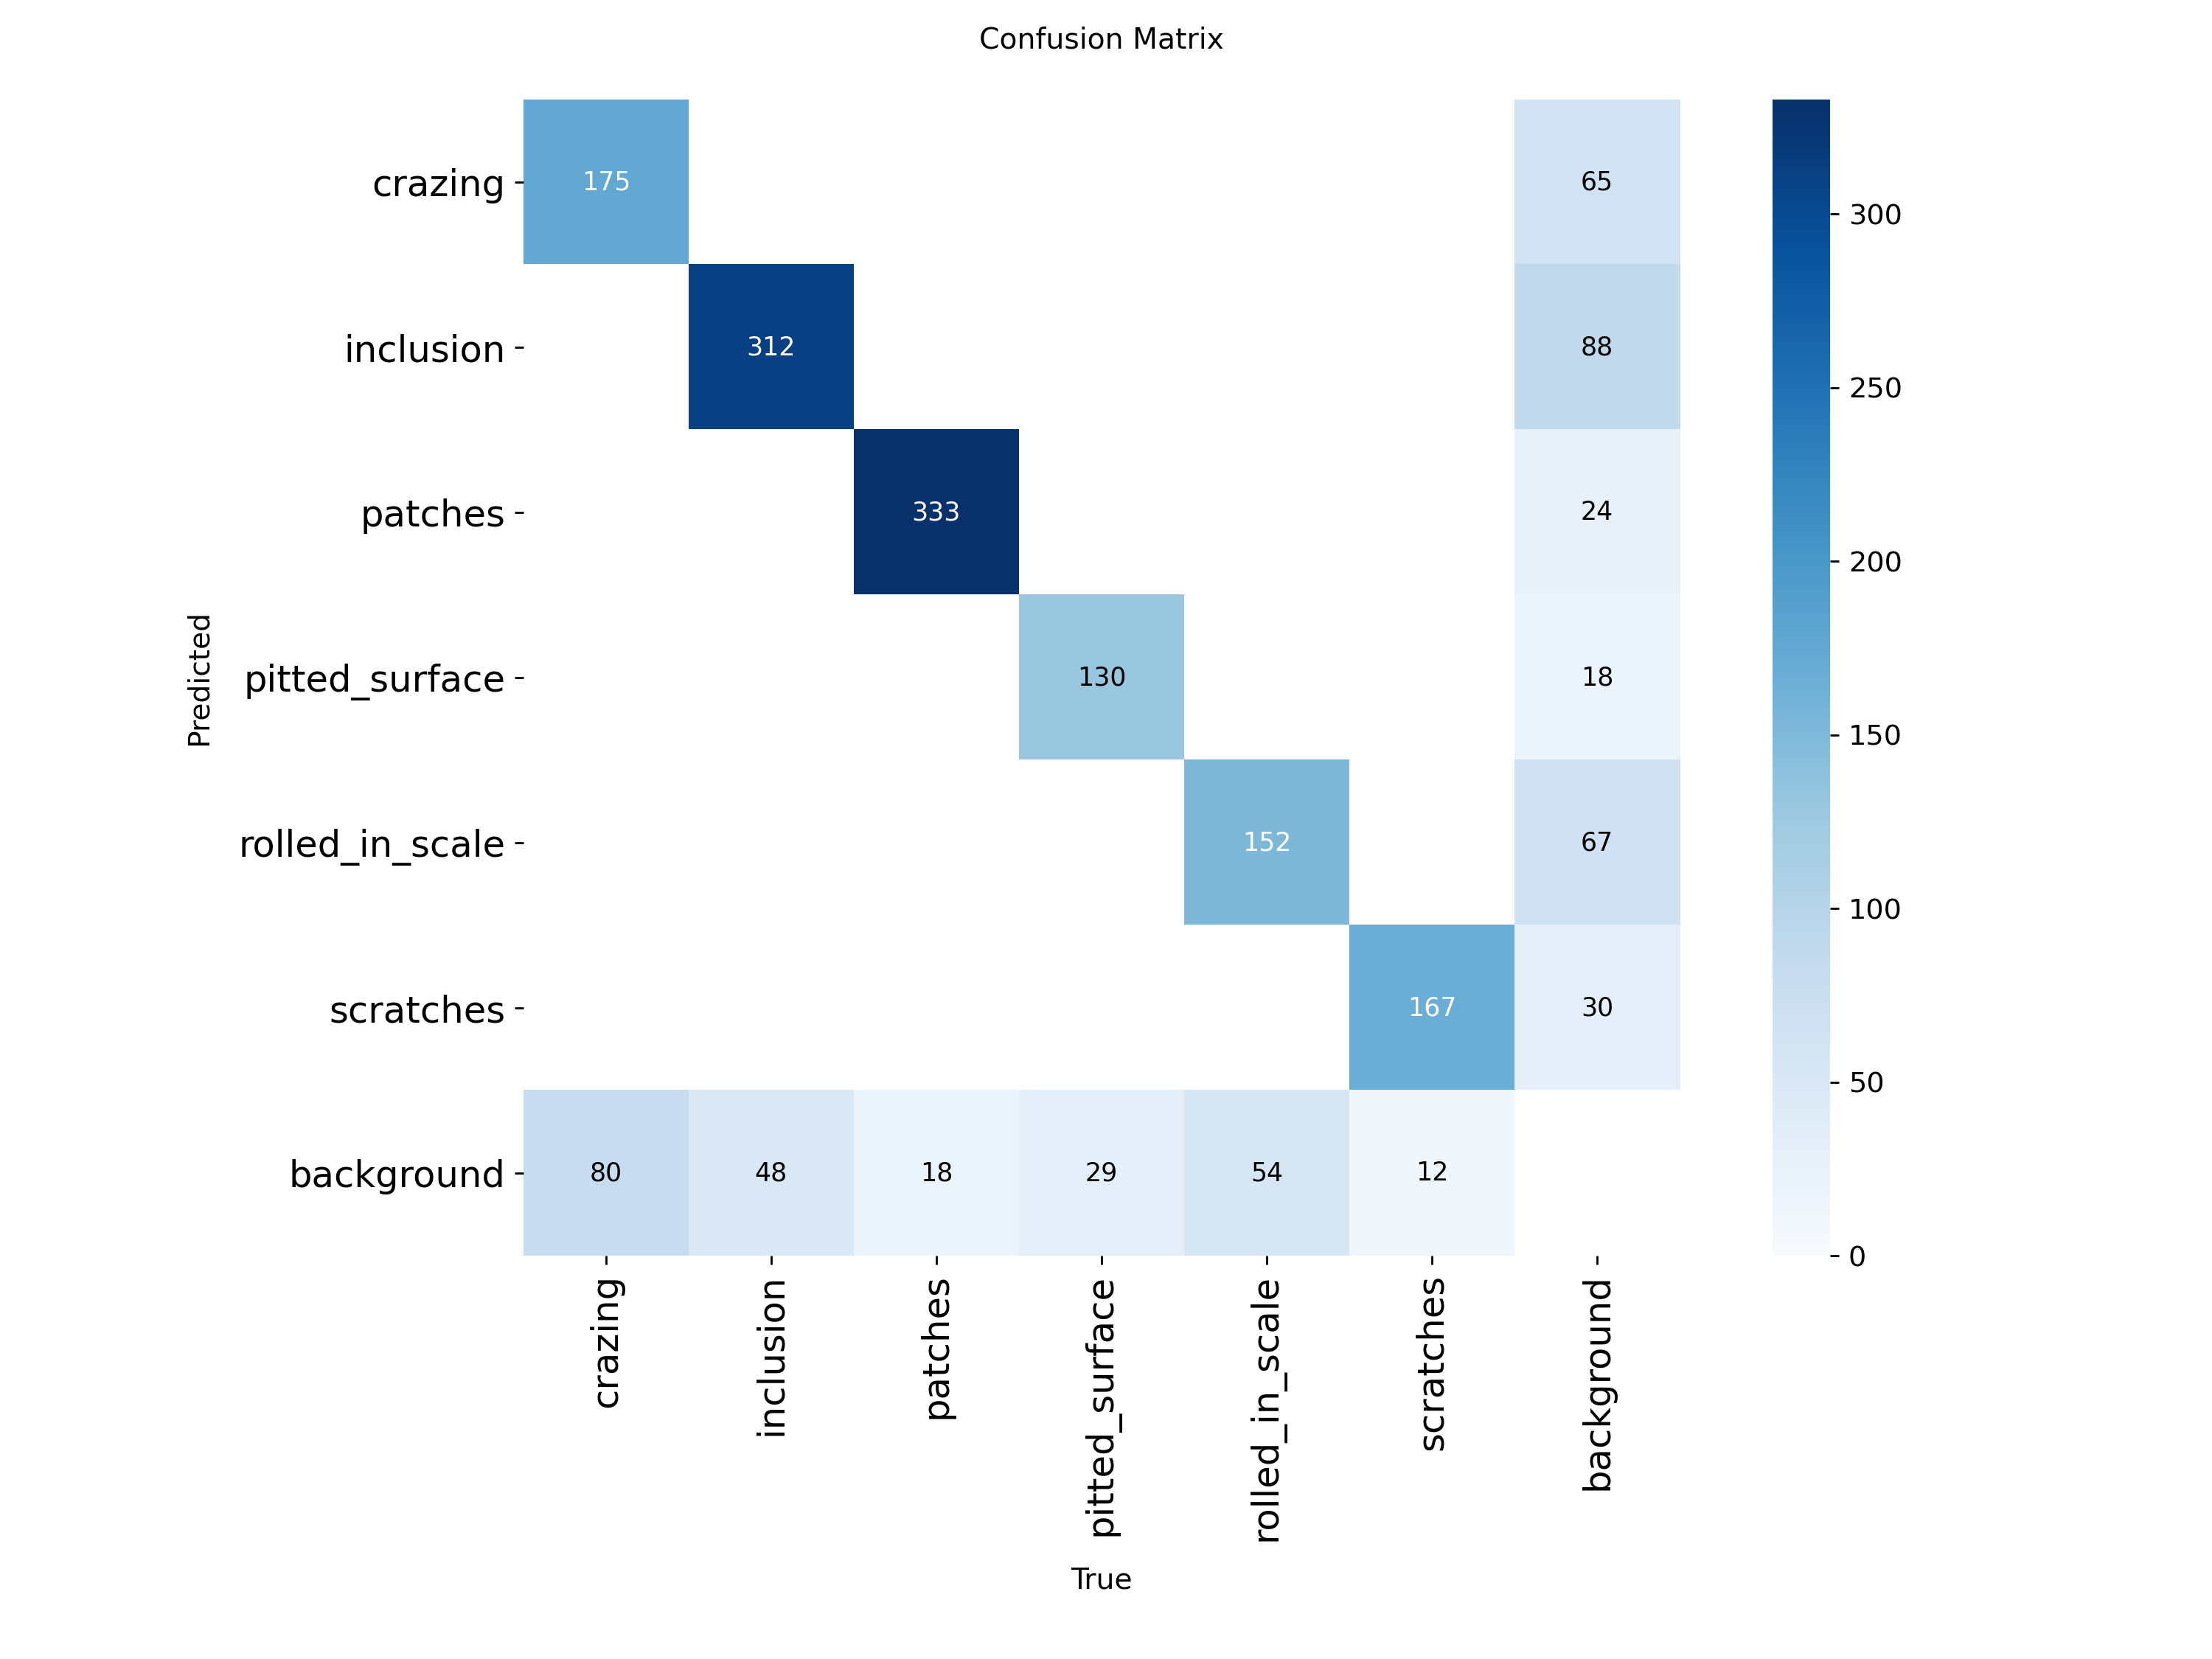

In [22]:
from IPython.display import Image
Image("/content/runs/detect/train4/confusion_matrix.png", width=600)


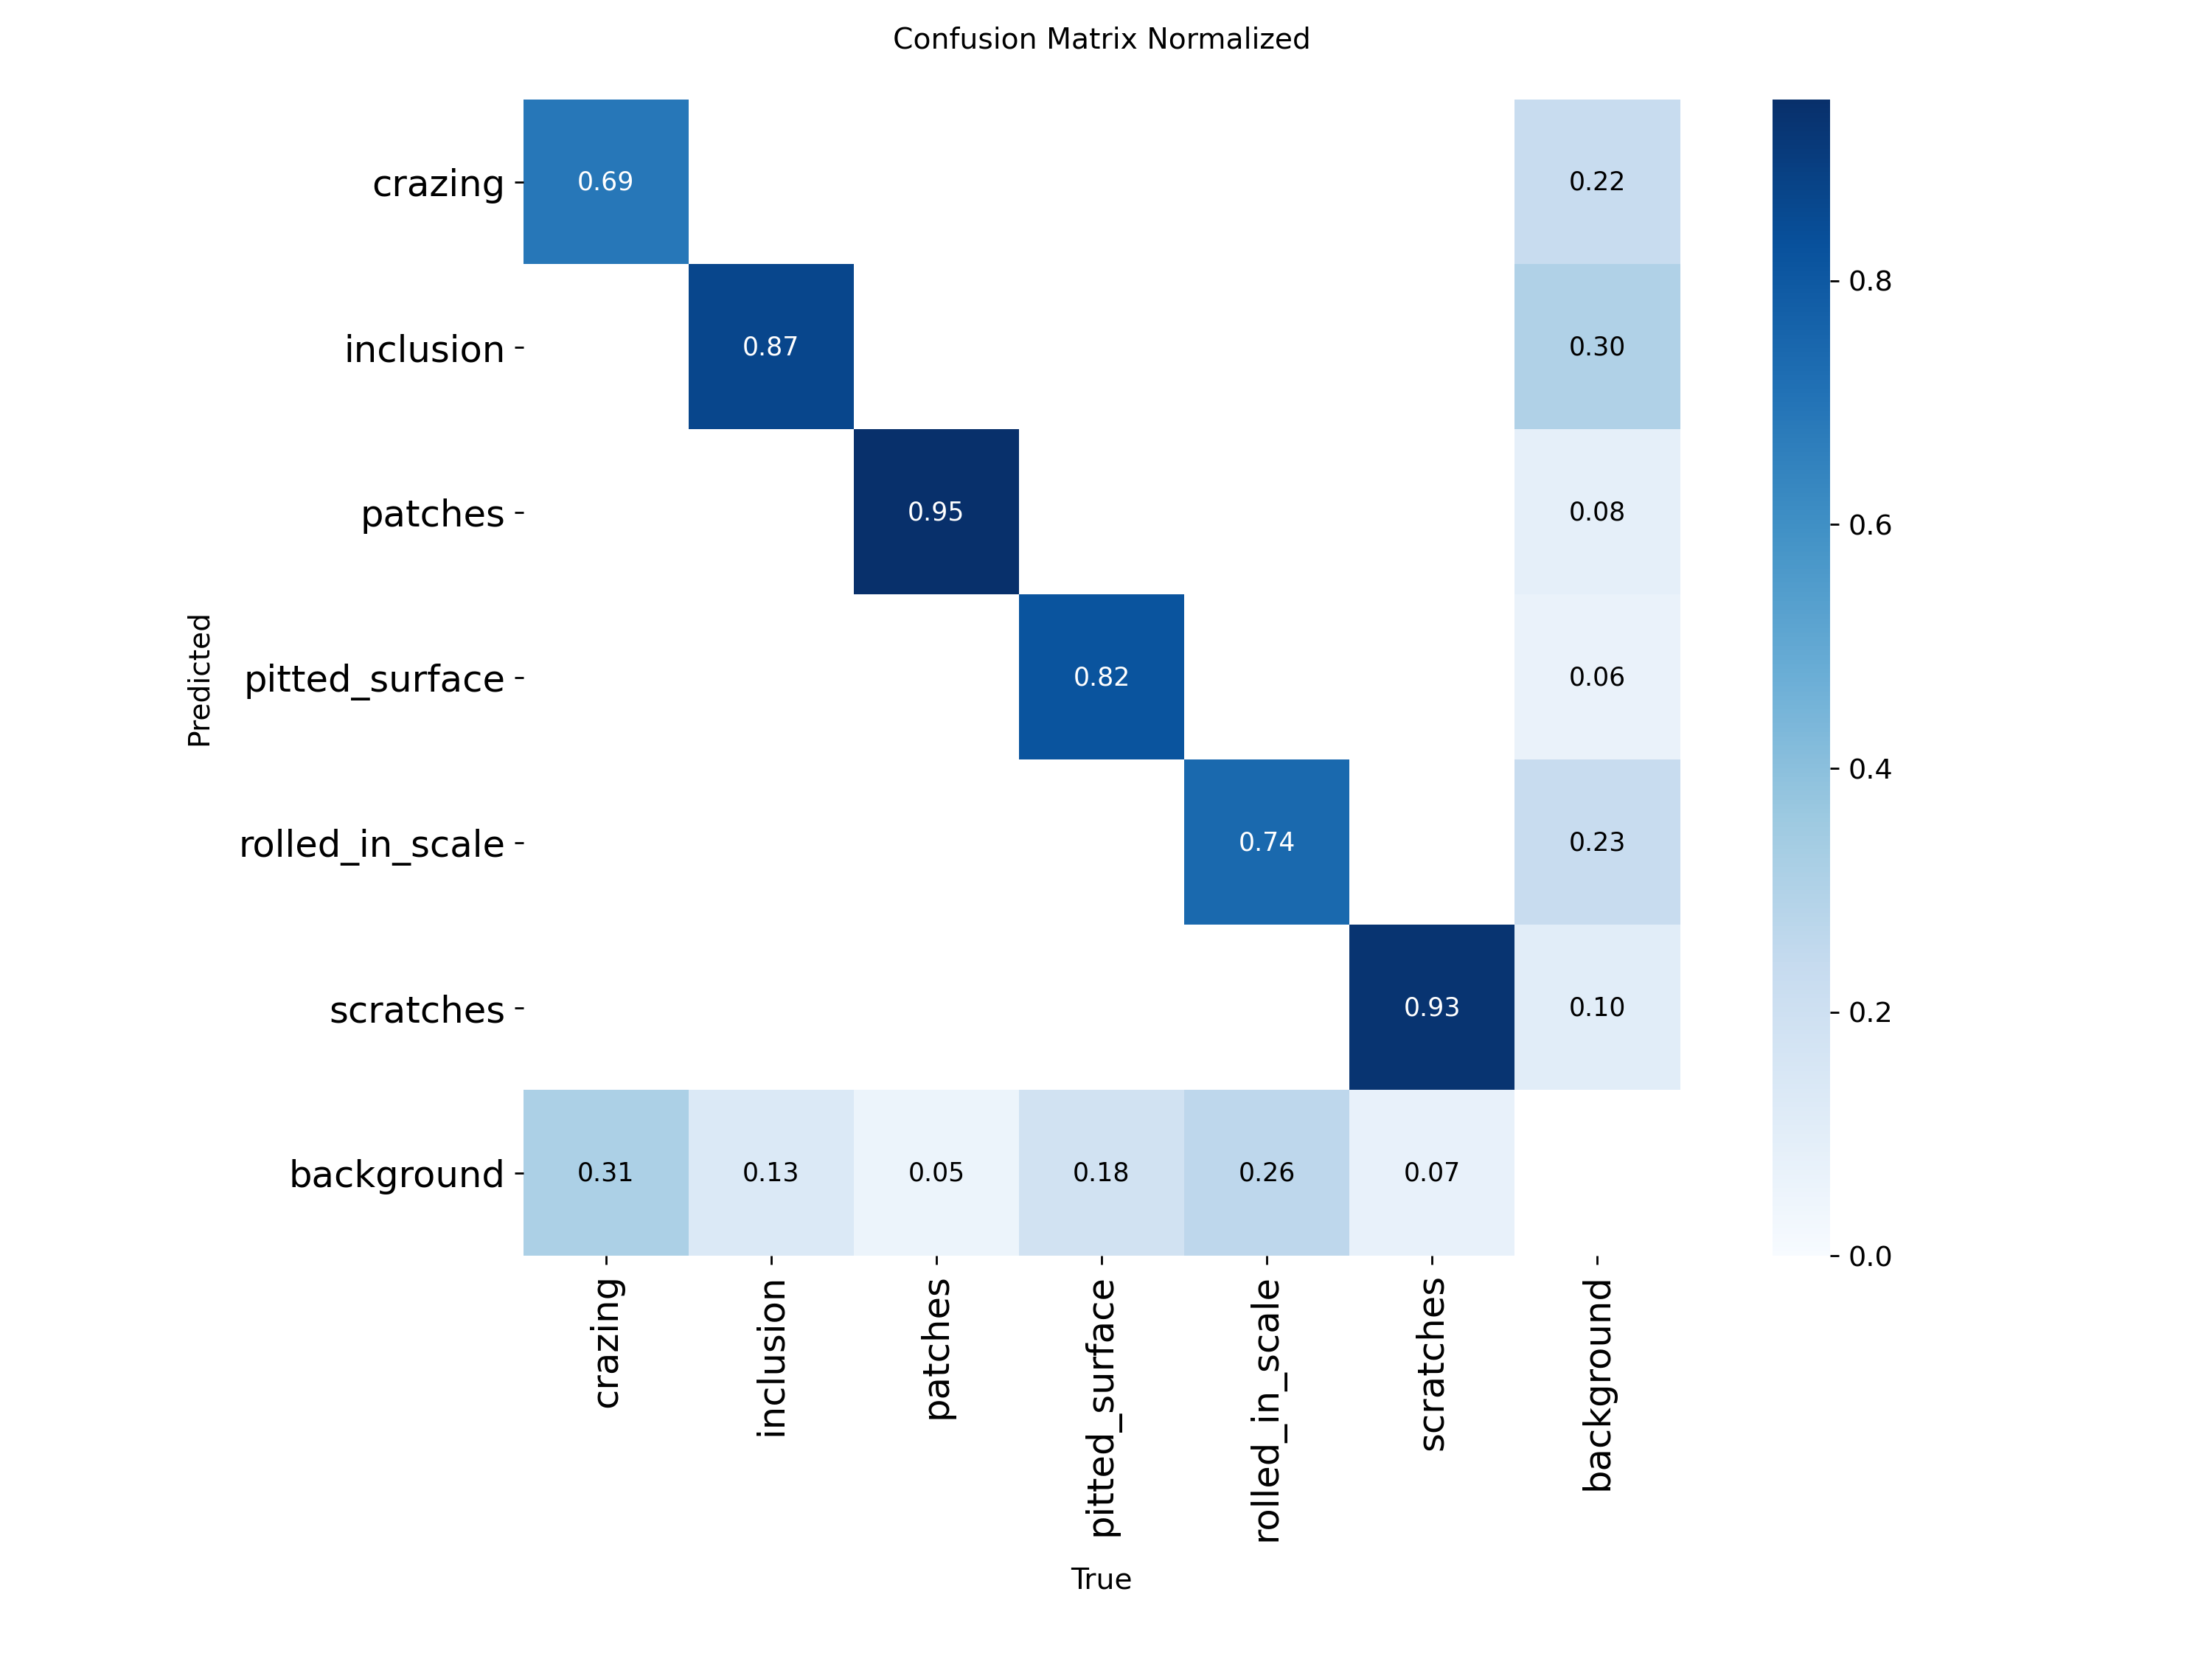

In [23]:
Image("/content/runs/detect/train4/confusion_matrix_normalized.png", width=600)

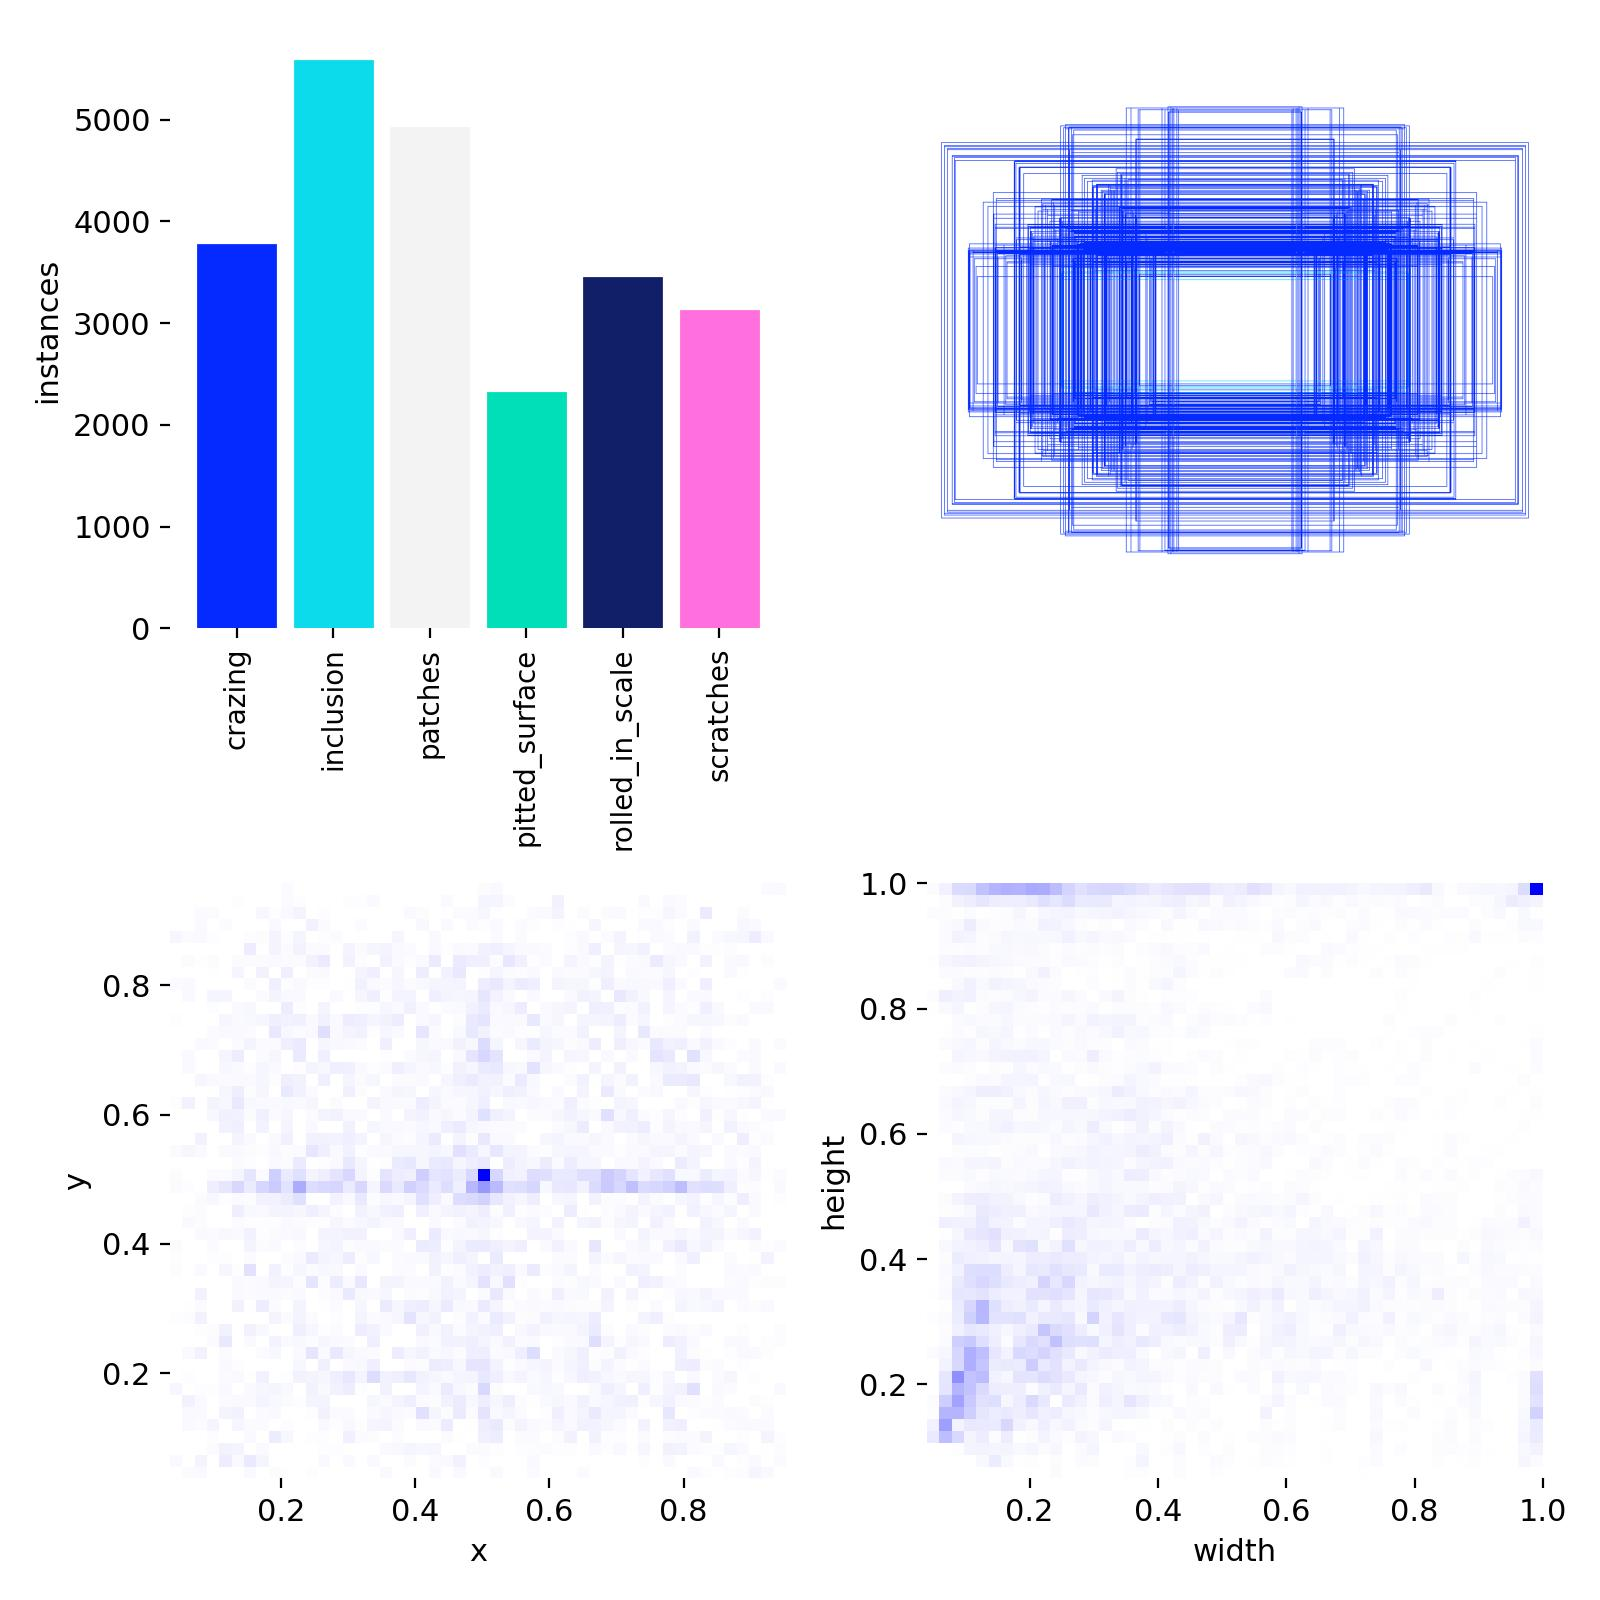

In [24]:
Image("/content/runs/detect/train4/labels.jpg", width=600)

These images are generated by the yolo model that consist of their bounding boxes and their confidence score

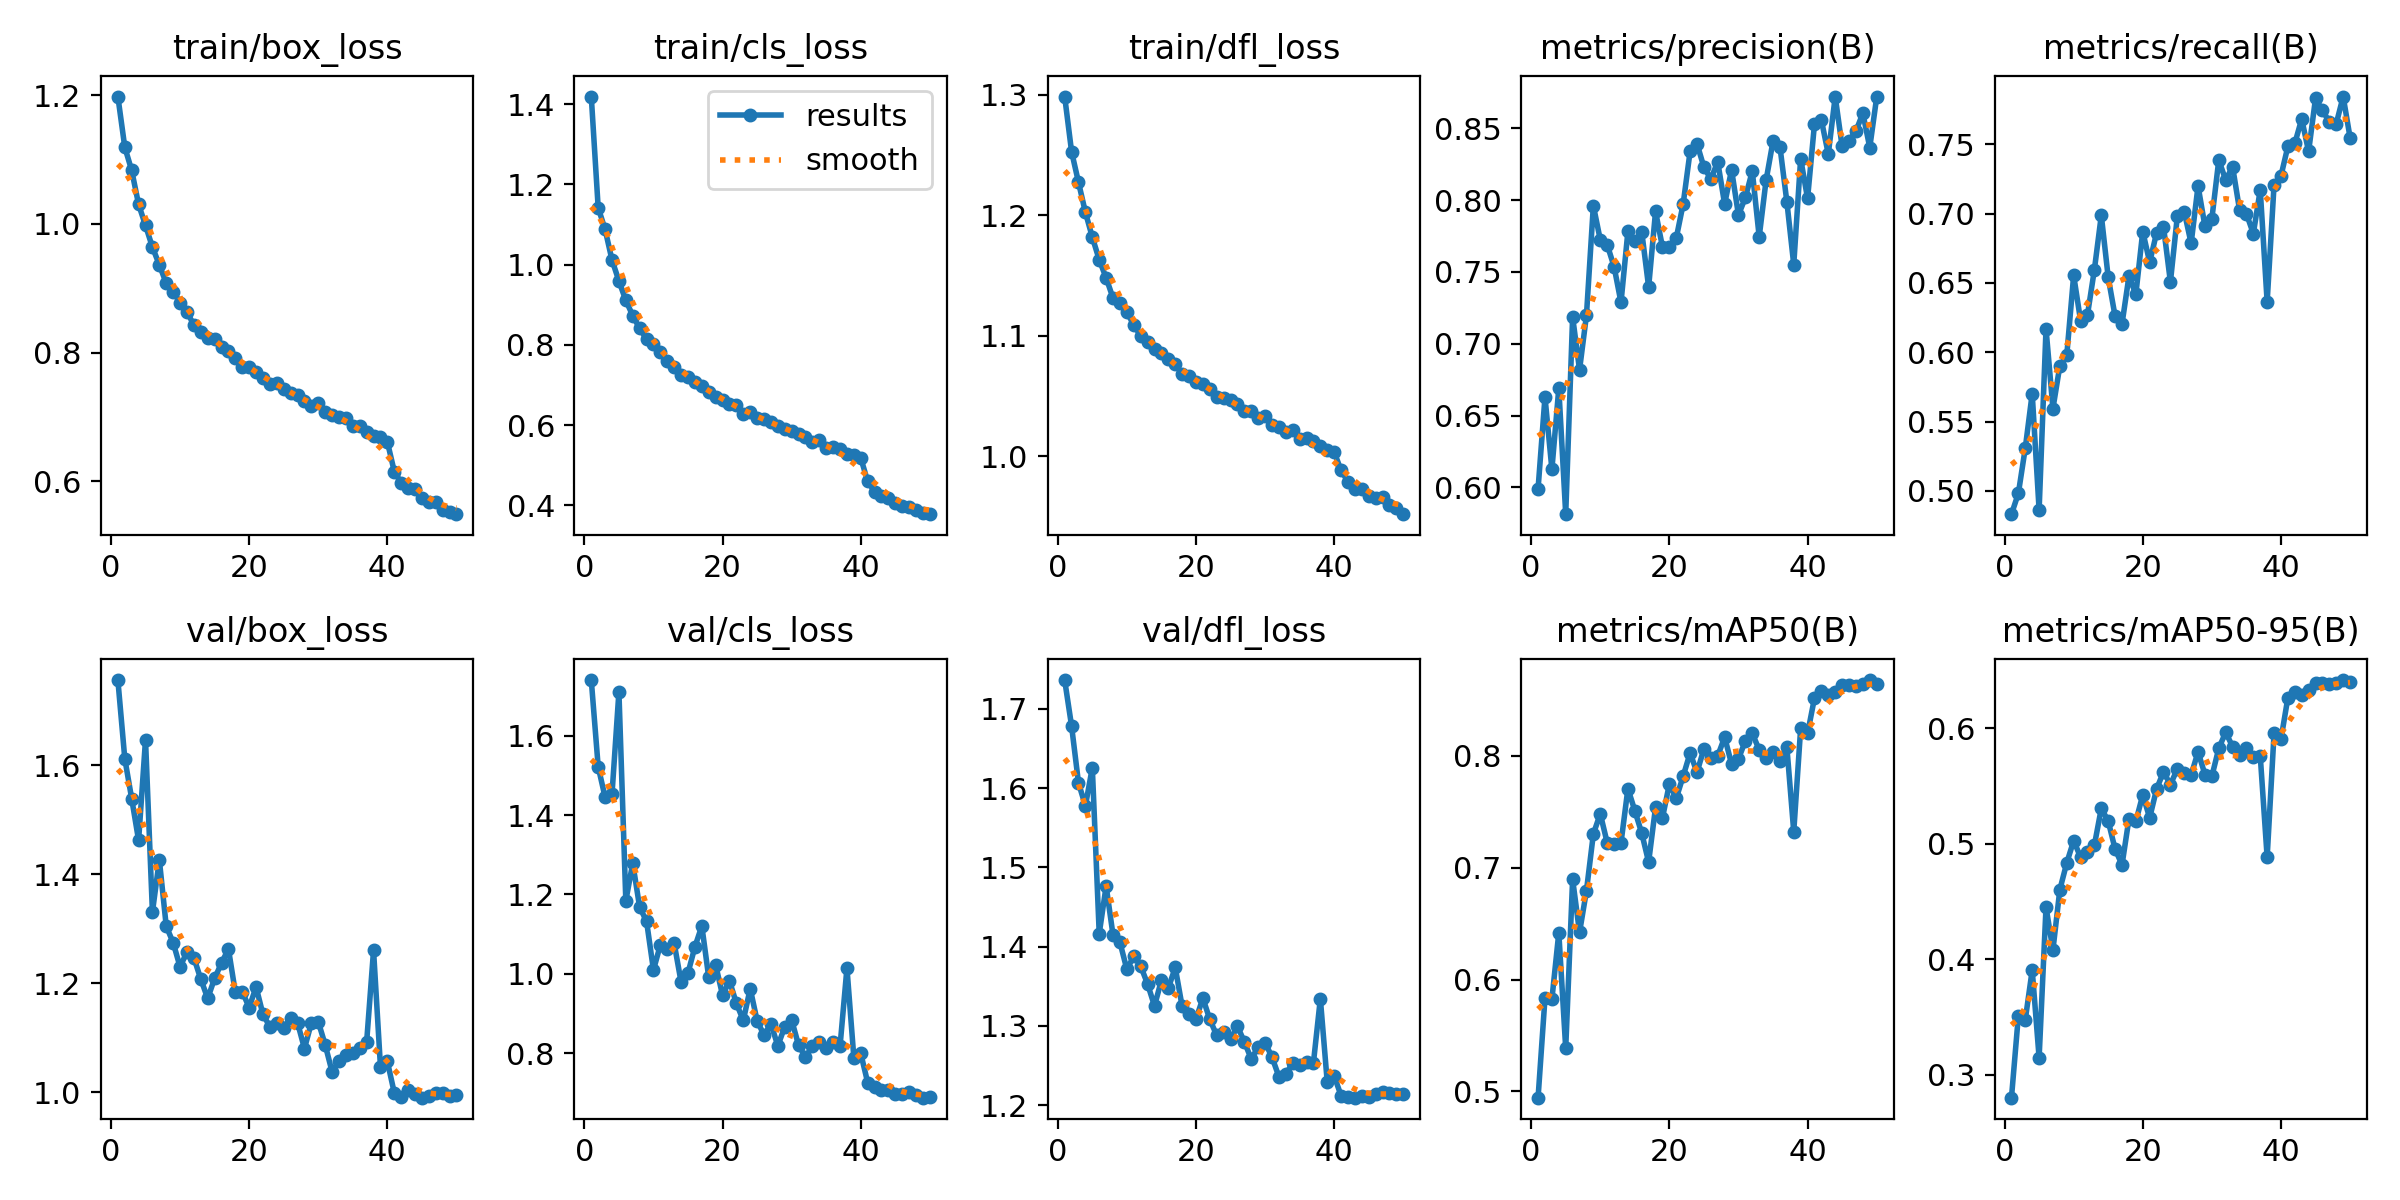

In [25]:
Image("/content/runs/detect/train4/results.png", width=600)

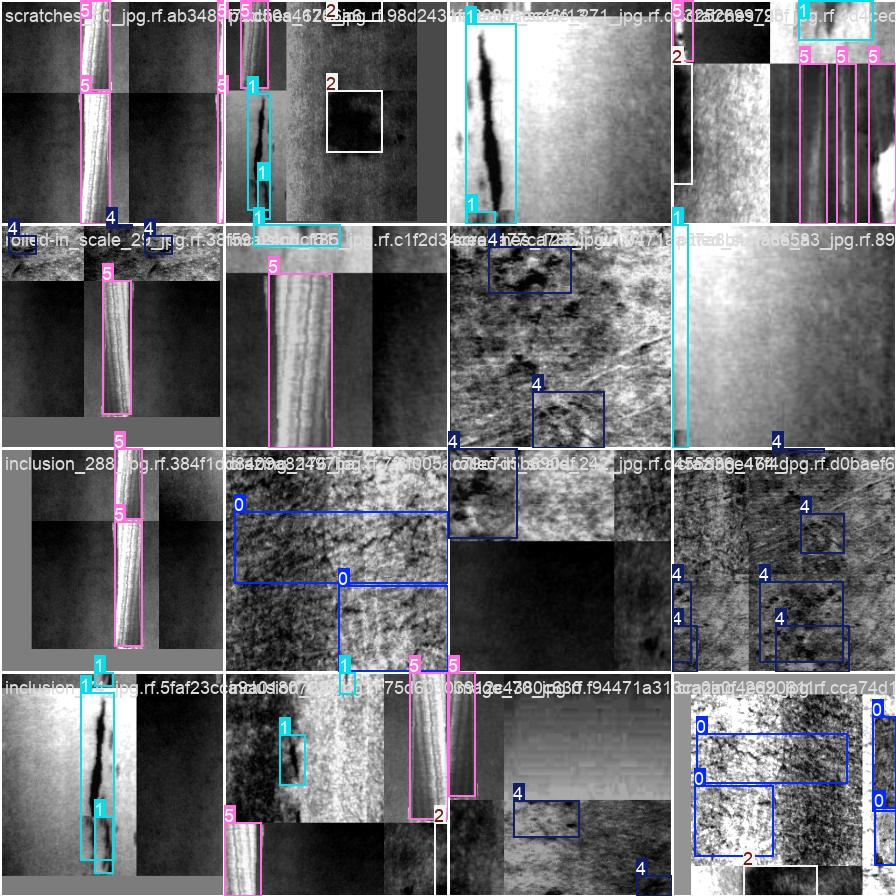

In [26]:
Image("/content/runs/detect/train4/train_batch0.jpg", width=600)

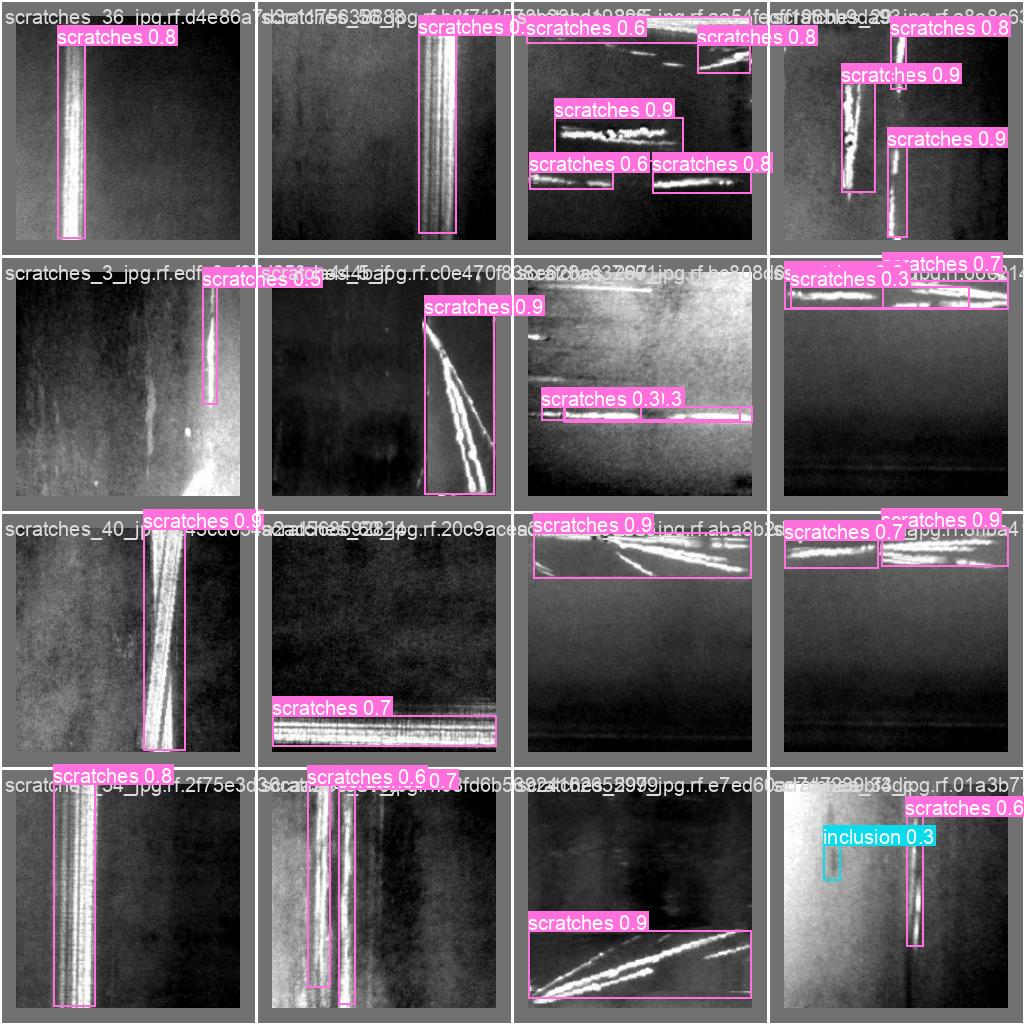

In [27]:
Image("/content/runs/detect/train4/val_batch0_pred.jpg", width=600)

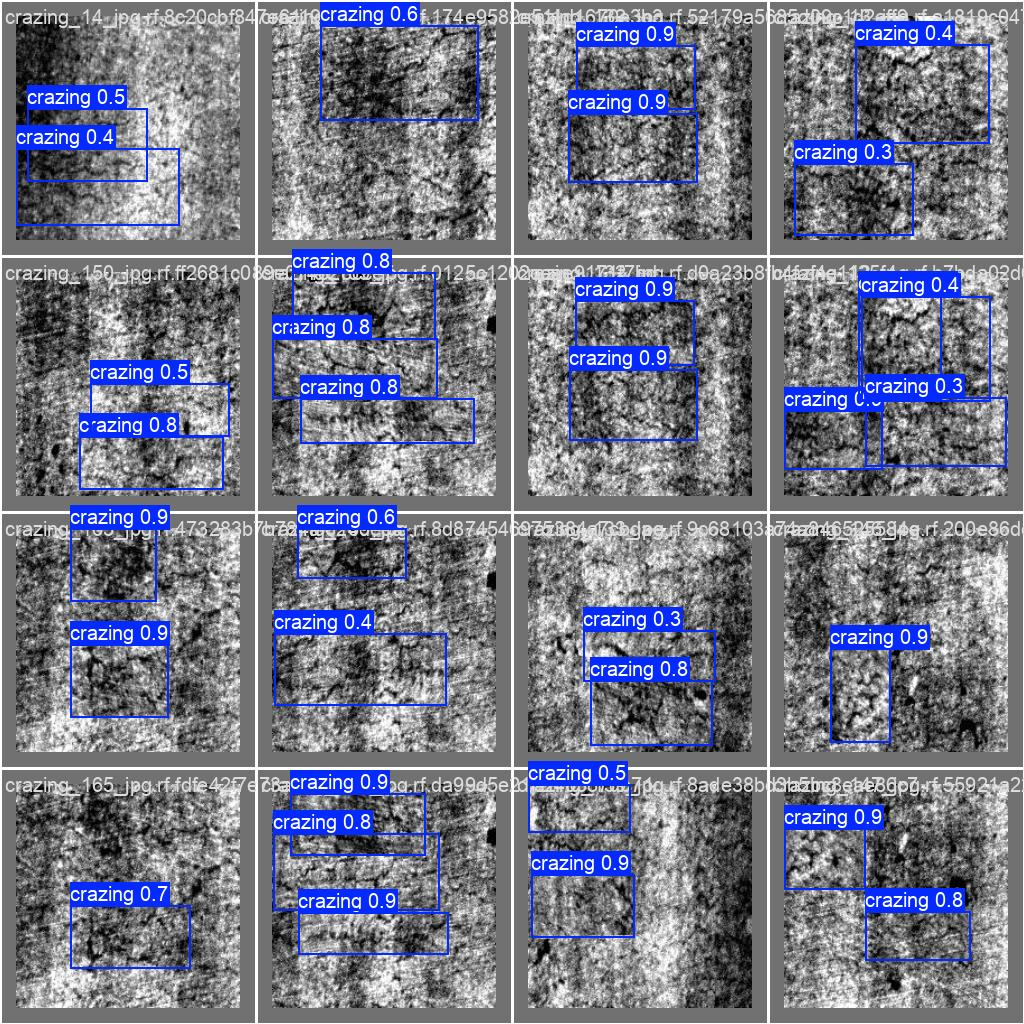

In [28]:
Image("/content/runs/detect/train4/val_batch1_pred.jpg", width=600)

# Validate Fine-Tuned Model

In [29]:
!yolo task=detect mode=val model="/content/runs/detect/train4/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 634.8±211.5 MB/s, size: 10.7 KB)
val: Scanning /content/Augmented-Neu-Dataset--3/valid/labels.cache... 684 images, 33 backgrounds, 0 corrupt: 100% 684/684 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 43/43 [00:05<00:00,  7.47it/s]
                   all        684       1510      0.836      0.785      0.868      0.642
               crazing        107        255      0.747      0.579      0.752      0.526
             inclusion        142        360      0.814      0.837      0.895      0.631
               patches        135        351      0.946      0.943      0.981      0.785
        pitted_surface        112        159      0.904      0.766      0.867      0.704
       rolled_in_scale         97      

Testing our model on the testing images and saving them to a folder

In [30]:
!yolo task=detect mode=predict model="/content/runs/detect/train4/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs

image 1/349 /content/Augmented-Neu-Dataset--3/test/images/adjusted_image_4_jpg.rf.88869dab5a8d0120968b3ce9a1df3466.jpg: 224x224 (no detections), 16.3ms
image 2/349 /content/Augmented-Neu-Dataset--3/test/images/bg-89-_jpg.rf.e7f2bbcc74135a62a438762d6a71c191.jpg: 224x224 (no detections), 12.3ms
image 3/349 /content/Augmented-Neu-Dataset--3/test/images/crazing_109_jpg.rf.04f08bbb72a0dc4d397aba9f00ebc94e.jpg: 224x224 1 crazing, 12.6ms
image 4/349 /content/Augmented-Neu-Dataset--3/test/images/crazing_110_jpg.rf.deffe48701d6bd1881aedf4b27d0167e.jpg: 224x224 2 crazings, 11.9ms
image 5/349 /content/Augmented-Neu-Dataset--3/test/images/crazing_113_jpg.rf.90f5afcd3320ab26af35133424f9443a.jpg: 224x224 1 crazing, 11.7ms
image 6/349 /content/Augmented-Neu-Dataset--3/test/images/crazing_125_jpg.rf.2c005090febf21db5d360a974e225f19.jpg

The predicted output

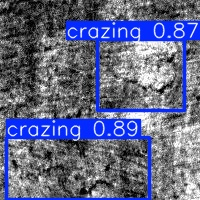

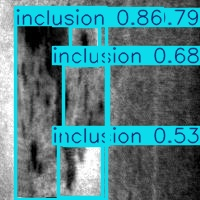

In [38]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[3:5]:
    display(IPyImage(filename=img, width=600))
    print("\n")



# DEPLOYEMENT

In [39]:
from google.colab import files
files.download('/content/runs/detect/train4/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>